<a href="https://colab.research.google.com/github/alorthius/LA-compendium/blob/master/labs/lab_3/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Work breakdown
Mykhailo-Taras Sobko - SVD of symmetrix matrices  
Anna-Alina Bondarets - Image compression using SVD  
Mykhailo Bondarenko - Results; SVD implementation with linalg.eigh

# Image compression with SVD

The singular value decomposition of a matrix A is the factorization of A into the
product of three matrices:
\begin{align}
 A = UDV^T, 
 \end{align}
where the columns of U and V are orthonormal and
the matrix D is diagonal with positive real entries. The SVD is useful in many tasks. First, in many applications, the data matrix A is close to a
matrix of low rank and it is useful to find a low rank matrix which is a good approximation
to the data matrix. You will show that from the singular value decomposition of A, we can get the matrix B of rank k which best approximates A; in fact we can do this for every
k. Also, singular value decomposition is defined for all matrices (rectangular or square)
unlike the more commonly used spectral decomposition in Linear Algebra. 

Considering that any image can be represented as a rectangular matrix, you can find best rank k approximation of this image using SVD. The idea is that by significantly reducing the storage space, you can still preserve a very good quality of the image

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widget
from sys import maxsize

### SVD of symmetric matrices (0.5 pts)

Here you have a symmetric matrix A. Compute a full SVD of this matrix (you may use built-in SVD functions).

In [ ]:
A = np.array([[1, 2, 3, 4], [2, 7, 4, 5], [3, 4, 3, 8], [4, 5, 8, 3]])

U, S, V_T = np.linalg.svd(A)
S = np.diag(S)

print(f"{U}\n\n{S}\n\n{V_T}")

[[-0.30461046 -0.14903379 -0.31295055 -0.88716591]
 [-0.54242371 -0.07127124  0.83165076 -0.09515223]
 [-0.53433563 -0.64331012 -0.35591771  0.41708524]
 [-0.57225381  0.74757035 -0.28938132  0.17298151]]

[[17.33847234  0.          0.          0.        ]
 [ 0.          5.15839249  0.          0.        ]
 [ 0.          0.          2.79573697  0.        ]
 [ 0.          0.          0.          0.97581683]]

[[-0.30461046 -0.54242371 -0.53433563 -0.57225381]
 [ 0.14903379  0.07127124  0.64331012 -0.74757035]
 [-0.31295055  0.83165076 -0.35591771 -0.28938132]
 [ 0.88716591  0.09515223 -0.41708524 -0.17298151]]


Explain, what matrices did you get as a result. What can you say about singular values of this matrix (about its eigenvalues)? Derive singular values without using built-in functions.

Every $m \times n$ matrix $A$ can be wirtten as $A = U \Sigma V^T$, where $U$ and $V$ are orthogonal $m \times m$ and $n \times n$ respectively and $\Sigma$ is an $m \times n$ matrix with singular values of $A$ on its main diagonal and zeros otherwise.

$U = \begin{bmatrix} u_1 & ... &  u_r & | & u_r+1 & ... & u_m \end{bmatrix}$

$V = \begin{bmatrix} v_1 & ... &  v_r & | & v_r+1 & ... & v_n \end{bmatrix}$

$v_j$ for $j = 1, ..., r$ are the eigenvectors of $A^TA$;

$u_j := \frac{Av_j}{\sigma_j}$ for $j = 1, ..., r$ form an orthonormal basis for the column space of $A$.

The singular values of $A$ are the square roots of the eigenvalues of symmetric positive semidefinite matrix $A^TA$. Therefore, they are nonnegatve.

$B := A^TA$

Denote by $\lambda_1 \ge ... \ge \lambda_n$ the eigenvalues of $B$.

$\sigma_j := \sqrt{\lambda_j}$ are the singular values of $A$.

In [ ]:
B = np.matmul(np.matrix.transpose(A), A)
B_evs = np.linalg.eig(B)[0]
np.sqrt(B_evs)

array([17.33847234,  5.15839249,  0.97581683,  2.79573697])

How $SVD$ relates to matrixes $Q, D, Q^T$ in spectral decomposition of this matrix. Are they identical? If they are, can you say that SVD of symmetric matrices always correspond to its spectral decomposition. If not, then is it possible to find such symmetric matrixes that SVD and spectral decomposition are identical?

In general, they are not identical. Consider the spectral decomposition $A=QDQ^{−1}$ and SVD $A = U \Sigma V^T$. Some key differences are as follows:

*   The vectors in the spectral decomposition matrix $Q$ are not necessarily orthogonal, so the change of basis isn't a simple rotation. On the other hand, the vectors in the matrices $U$ and $V$
in the SVD are orthonormal, so they do represent rotations;

*   In the SVD, the nondiagonal matrices $U$
and $V$ are not necessairily the inverse of one another. In the spectral decomposition the nondiagonal matrices $P$ and $P^{−1}$
are inverses of each other;

*   In the SVD the entries in the diagonal matrix $\Sigma$
are all real and nonnegative. In the spectral decomposition, the entries of $D$
can be any complex number;

*   The SVD always exists for any sort of rectangular or square matrix, whereas the spectral decomposition can only exists for Hermitian, skew-Hermitian, and unitary square matrices.

So that means, in order for the SVD of $A$ to be equal to its eigendecomposition, we need A to:

*   Have orthonormal eigenvectors;
*   Have positive eigenvalues.

The above conditions are equivalent to the following:

*   $A$ must be a Hermitian matrix (this is equivalent to $A$ having real eigenvalues and orthonormal eigenvectors);

*   $A$'s (real) eigenvalues must be positive.

That means that they are equal when $A$ is Hermitian positive semidefinite.


### Image compression using SVD (1.5 pts)

Upload the picture of the statue of liberty
https://www.history.com/.image/ar_4:3%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTY1MTc1MTk3ODI0MDAxNjA5/topic-statue-of-liberty-gettyimages-960610006-promo.jpg

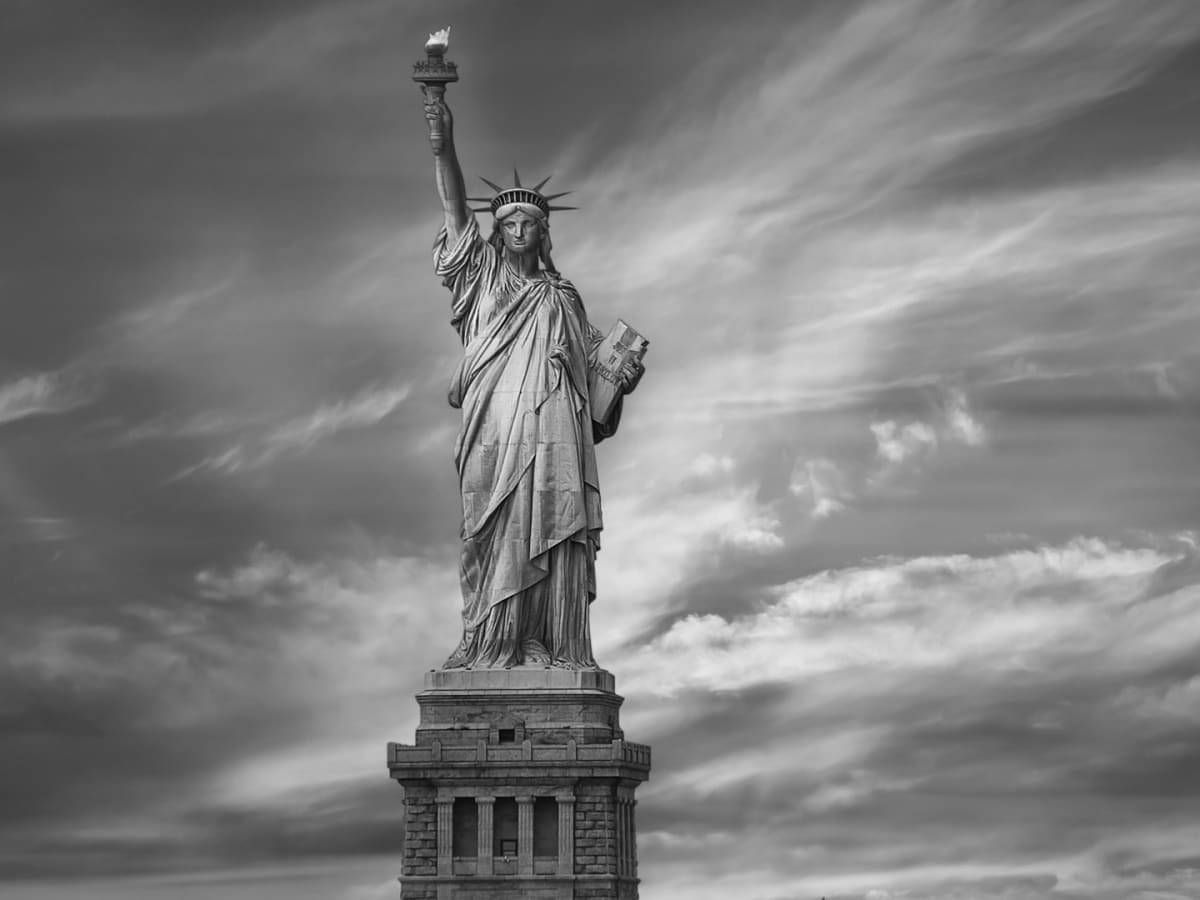

In [ ]:
path = "statue.jpg"
image = cv.imread(path)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image)

Complete the below function for finding a reduced SVD of a given matrix. (You may use the functions for finding eigenvalues of the matrix). Highlight the key differences between SVD and the reduced version of it.

There are different types of the reduced SVD:

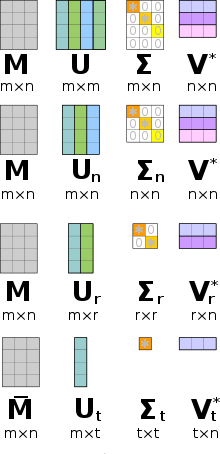

1: Full SVD without reducing

2: Thin SVD - remove columns of $U$ not corresponding to rows of $V^T$

3: Compact SVD - remove vanishing singular values and corresponding columns/rows in $U$ and $V^T$

4: Truncated SVD - keep only largest $t$ singular values and corresponding columns/rows in $U$ and $V^T$

Each of them are useful because of the less space and computation time.

We implemented the **Thin SVD** reduction:
$$M = U_k \Sigma_k V^T_k$$, where $k = min(m, n)$

The conditions above are guaranteed to hold with the `full_matrices=False` argument passing to the `svg=d` function.

Complete the function below. It should output the k-rank approximation of the given image using previously written SVD function.
Use the slider to see how the image quality changes as we increase/decrease k

In general, compressing image to 60-80% percent of its original size  lowers a quality of the image, but human eye won't be even able to notice it. Therefore, we can win in storage while keeping almost the same image quality. Find out the range of $k$s, which result in keeping only 60-80% of the size of the original image. For what $k$s there is no reason to use SVD for the sake of reducing storage space?

In [ ]:
from scipy import linalg

def reduced_svd(A):
    '''
    Input: any matrix A
    Returns: tuple of matrix U, array of singular values and matrix V.T 
    '''
    A_f = A.astype(float)
    atav, V = np.linalg.eigh(A_f.T @ A_f)
    atav_s = np.argsort(atav)[::-1]
    atav = atav[atav_s]
    V = V[:, atav_s]
    S = np.sqrt(atav)
    return ((A_f @ V) / S), S, V.T


@interact(k=widget.IntSlider(min=1, max=np.linalg.matrix_rank(image[:, :]), value=100), image=fixed(image))
def k_rank_compressed_image(k, image):
    # your code here
    U, S, VT = reduced_svd(image)
    cv2_imshow(U[:,:k] @ np.diag(S[:k]) @ VT[:k])


interactive(children=(IntSlider(value=100, description='k', max=900, min=1), Output()), _dom_classes=('widget-…

The image size can be computed given its shape: $size = m \cdot n$, when image is represented with $m \times n$ matrix $M$.

The size of the compressed with SVD image can be computed analogously: $comp\_size = m \cdot k + k + k \cdot n$.

Using simple loops, we can find the $(60\%, 80\%)$ range for the $k$s and the limiting $k$, after which the compressed after SVD image would have even greater size than the original one.

In [ ]:
def compressed_size(image):
  # your code here
  m, n = image.shape[0], image.shape[1]
  original_size = m * n

  # find k_min such as for all k >= k_min
  # the compressed size is > 60% of the original size
  k_min = 1
  comp_size = 0
  while comp_size <= 0.6 * original_size:
    comp_size = m * k_min + k_min + k_min * n
    k_min += 1
  size_min = comp_size

  # find k_max such as for all k < k_min
  # the compressed size is < 80% of the original size
  k_max = min(m, n)
  comp_size = original_size
  while comp_size >= 0.8 * original_size:
    comp_size = m * k_max + k_max + k_max * n
    k_max -= 1
  size_max = comp_size

  # find k_limit such as for all k >= k_limit
  # the compressed size is > the original size
  k_limit = min(m, n)
  comp_size = maxsize
  while comp_size > original_size:
    comp_size = m * k_limit + k_limit + k_limit * n
    k_limit -= 1
  size_limit = comp_size

  return (k_min, k_max, k_limit, size_min, size_max, size_limit)

print(image.shape)
print("Original size:", image.shape[0] * image.shape[1])
lower_bound_size, upper_bound_size, compression_limit_size = compressed_size(image)[3:]
print("Size values for 60-80% compression:", lower_bound_size, "-", upper_bound_size)
print("It makes no sense for compression with SVD with size greater then the limit:", compression_limit_size)


(900, 1200)
Original size: 1080000
Size values for 60-80% compression: 649209 - 863511
It makes no sense for compression with SVD with size greater then the limit: 1079914


In [ ]:
# your code here
lower_bound_k, upper_bound_k, compression_limit = compressed_size(image)[:3]

print("Range of k for 60-80% compression:", lower_bound_k, "-", upper_bound_k)
print("It makes no sense for compression with SVD for k more than:", compression_limit)


Range of k for 60-80% compression: 310 - 410
It makes no sense for compression with SVD for k more than: 513


### Results (1 pts) 
Choose some metric for determining how good the compression with SVD is. Experiment with other compression algorithms (DCT, for instance). Compare it with SVD.

To design such a metric we would need some measure of image quality.\
If we suppose that a person judges the quality of an image compression by the deviation of pixel saturation from the original image (b/w), there is a simple metric that can be used for measuring the quality of an image compression. We should make E(I, C), where I is the original image and C is the one restored after compression, be equal to the standard error of the distribution of pixel saturation differenes between I and C. The lower E(I, C) is, the better.

In [ ]:
def E(I, C):
    return np.std(I - C);

Now we should use this metric to fix the maximum E(I, C) we would like to allow and see how muh compression we can achieve.\
\
The desired E(I, C) was set to be <= 2.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


k=257, e=0.45280717270519255
k=129, e=1.860650877600239
k=65, e=4.298305634681294
k=97, e=2.782595795182057
k=113, e=2.2677364473200115
k=105, e=2.5098485000572346
k=109, e=2.38405451175345
k=107, e=2.445614844038153
k=106, e=2.4776879990981104

Minimum possible k for E(I, C) < 2.5: k=106
Achieved compression: 79.38%



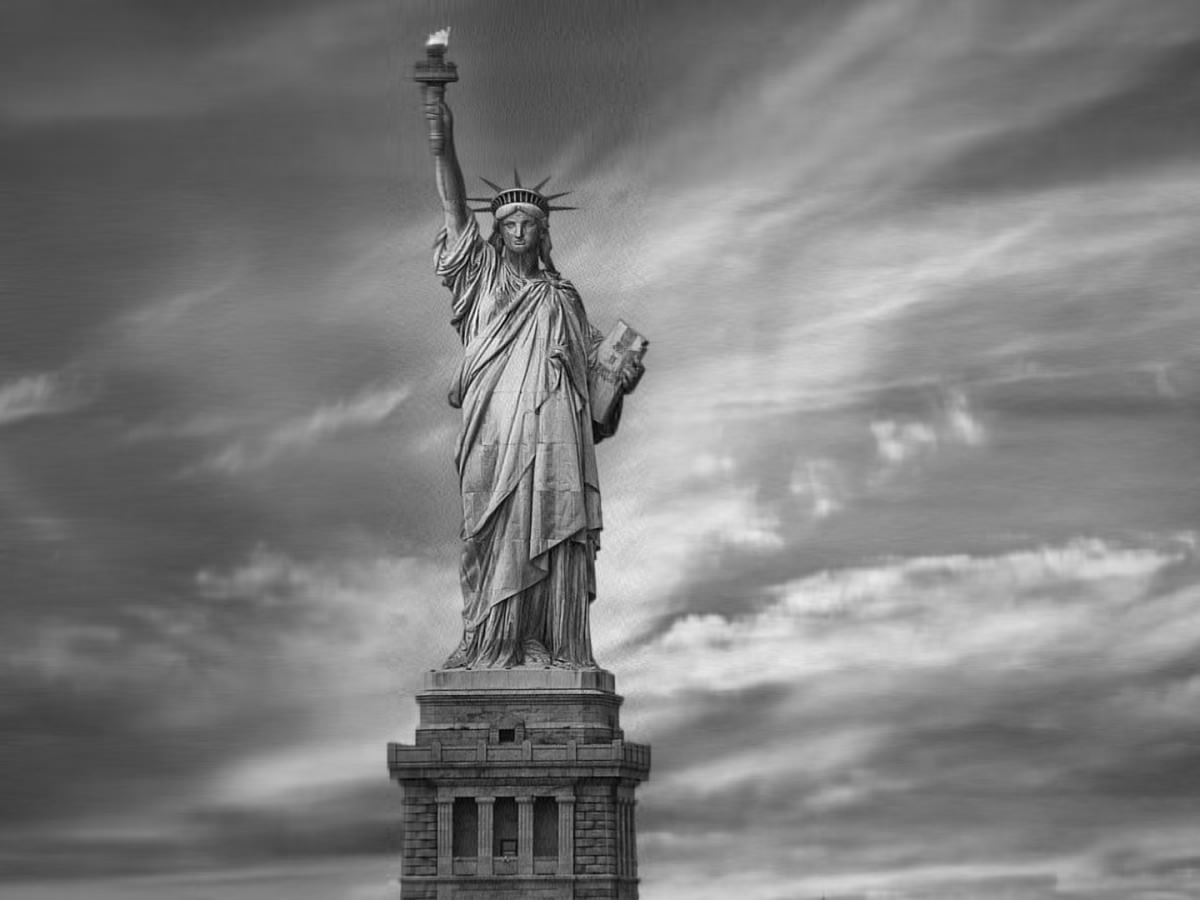

In [ ]:
from scipy.sparse.linalg import svds
def restore_compressed(k):
    u, s, vT = reduced_svd(image)
    return u[:,:k] @ np.diag(s[:k]) @ vT[:k]

m, n = image.shape[0], image.shape[1]
k_r_min, k_r_max = 1, compression_limit
while k_r_min < k_r_max:
    k = (k_r_min + k_r_max) // 2
    C = restore_compressed(k)
    e = E(image, C)
    print(f"k={k}, e={e}")
    if e > 2.5:
        k_r_min = k + 1
    else:
        k_r_max = k

print(f"\nMinimum possible k for E(I, C) < 2.5: k={k}")
print(f"Achieved compression: {round((1 - (m * k + k + k * n) / (m * n)) * 100, 2)}%\n")

cv2_imshow(C)

Now let's compare the results to DCT:

As we can see, higher compression (96.76% vs 79.38%) was achieved with DCT than SVD, but they both performed very well, removing the majority of the data while keeping the image in good quality.

threshold=0.5, e=47.385634923448876
threshold=0.25, e=11.517139741875203
threshold=0.125, e=8.859963453710364
threshold=0.0625, e=6.8907265227359895
threshold=0.03125, e=4.761808810349118
threshold=0.015625, e=2.9595793770433225
threshold=0.0078125, e=1.5694194966297688
threshold=0.01176875, e=2.3252782636412688
threshold=0.013746874999999999, e=2.610734022743896
threshold=0.012807812499999998, e=2.4836587659790137

Maximum possible threshold for E(I, C) < 2.5: threshold=0.012807812499999998
Achieved compression: 96.76%



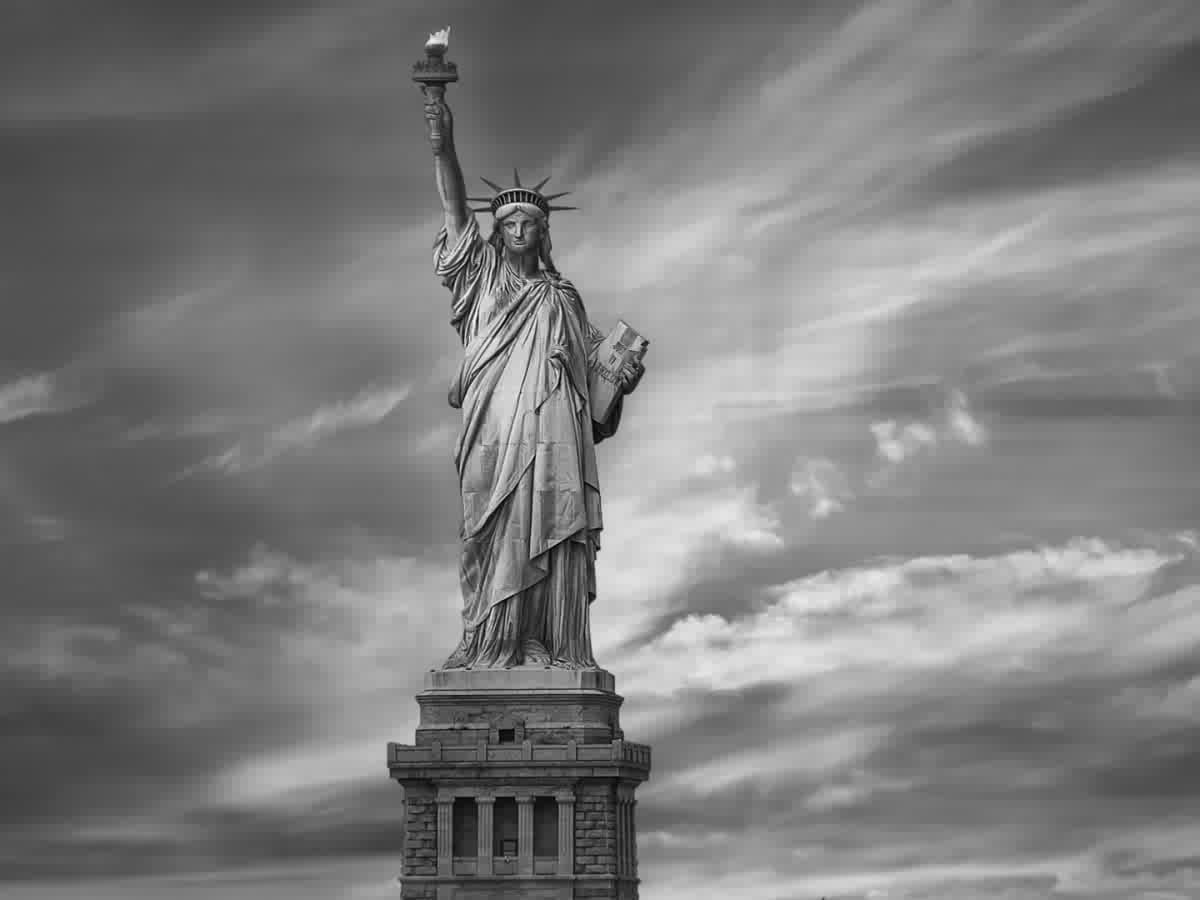

In [ ]:
from scipy.fftpack import dct, idct

# get initial dct transform by 8x8 (JPEG) blocks
dct_t = np.zeros(image.shape)
for i in range(0, image.shape[0], 8):
    for j in range(0, image.shape[1], 8):
        dct_t[i:i+8, j:j+8] = dct(dct(  # 2 times since this is a matrix
            image[i:i+8, j:j+8], axis=0, norm='ortho'
        ), axis=1, norm='ortho')

def restore_dct_compressed(dct_comp):
    C = np.zeros(image.shape)
    for i in range(0, image.shape[0], 8):
        for j in range(0, image.shape[1], 8):
            C[i:i+8, j:j+8] = idct(idct(
                dct_comp[i:i+8, j:j+8], axis=0, norm='ortho'
            ), axis=1, norm='ortho')
    return C

threshold_min, threshold_max = 0, 1
while (threshold_max - threshold_min) > 0.001:
    threshold = (threshold_min + threshold_max) / 2
    dct_comp = dct_t * (abs(dct_t) > (threshold * np.max(dct_t)))
    C = restore_dct_compressed(dct_comp)
    e = E(image, C)
    print(f"threshold={threshold}, e={e}")
    if e > 2.5:
        threshold_max = threshold
    else:
        threshold_min = threshold + 0.0001

print(f"\nMaximum possible threshold for E(I, C) < 2.5: threshold={threshold}")
print(f"Achieved compression: {round(np.sum(dct_comp == 0) / (m * n) * 100, 2)}%\n")

cv2_imshow(C)